In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from gridworld import * # Get this from GitHub!
np.random.seed(1234)
plt.rcParams.update({'font.size': 18})

In [3]:
env = gridworld()
env.show_grid()

--------------------------
|    |    |    |    | G  |  
--------------------------
|    |    | S  |    |    |  
--------------------------
|    |    |    |    | T  |  
--------------------------


In [4]:
q_table = np.zeros((env.dim[0], env.dim[1], len(env.action_space)))
q_table.shape

(3, 5, 4)

In [5]:
# Parameters
num_episodes = 1000
gamma = 0.99
eps = 0.05
lr = 0.01

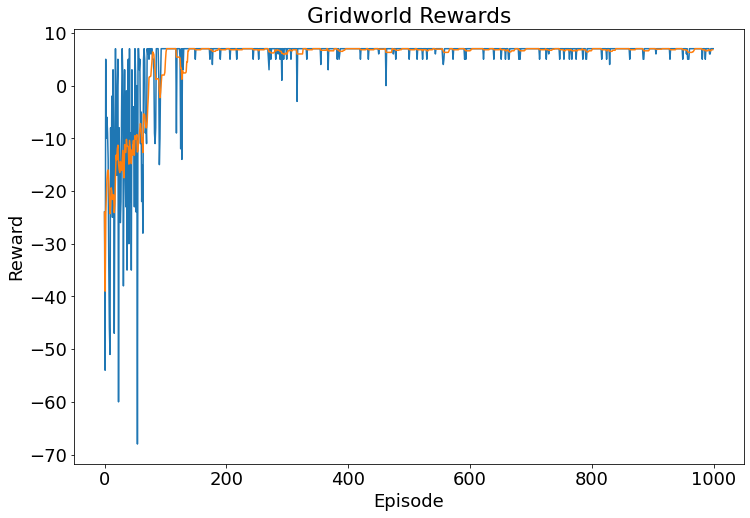

In [6]:
# Empty lists to track the number of rewards
ep_rewards = []
n_steps = []

# Zero out the Q-table
q_table = np.zeros((env.dim[0], env.dim[1], len(env.action_space)))

# Loop through the algorithm
for ep in range(num_episodes):
    s_0 = env.reset()
    done = False
    rewards = 0
    while done == False:
        # Take random action with epsilon probability
        if np.random.rand() < eps:
            action = np.random.choice(env.action_space)
        else:
            # Take greedy action
            action = np.argmax(q_table[s_0[0], s_0[1]])

        s_1, reward, done = env.step(action)
        
        # Update the Q-table
        q_table[s_0[0], s_0[1], action] += lr*(reward + \
                                               gamma*np.max(q_table[s_1[0], s_1[1]]) \
                                               - q_table[s_0[0], s_0[1], action])
        s_0 = s_1.copy()
        rewards += reward
        if done:
            ep_rewards.append(rewards)
            
# Calculate rolling average
mean_rewards = [np.mean(ep_rewards[n-10:n]) if n > 10 else np.mean(ep_rewards[:n]) 
               for n in range(1, len(ep_rewards))]

# Plot results
plt.figure(figsize=(12,8))
plt.plot(ep_rewards)
plt.plot(mean_rewards)
plt.title('Gridworld Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [7]:
len(n_steps)

0

In [8]:
q_table.shape

(3, 5, 4)

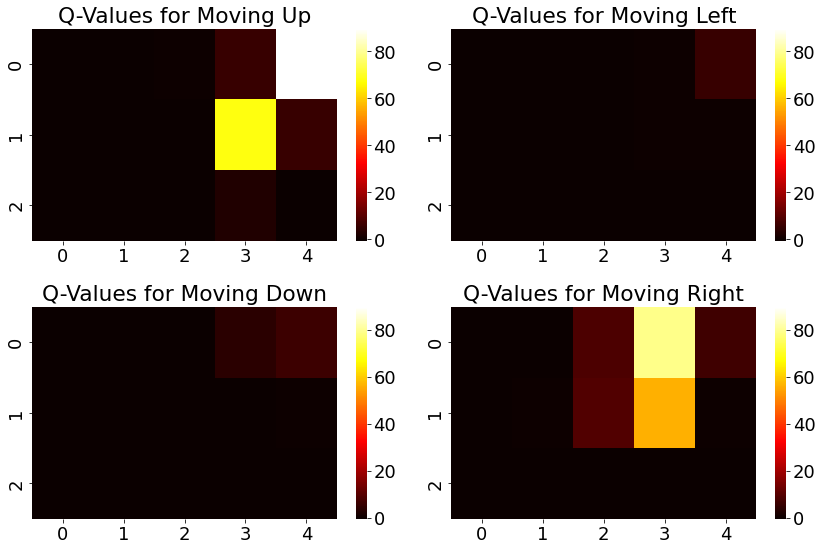

In [9]:
plt.figure(figsize=(12,8))
for a_idx in env.action_space:
    plt.subplot(2,2,a_idx + 1)
    sns.heatmap(q_table[:,:, a_idx], cmap='hot', 
                vmin=np.min(q_table), vmax=np.max(q_table))
    # Get direction name from dictionary
    direction = [i for i in env.action_dict if env.action_dict[i] == a_idx]
    plt.title('Q-Values for Moving {}'.format(direction[0]))

plt.tight_layout()
plt.show()

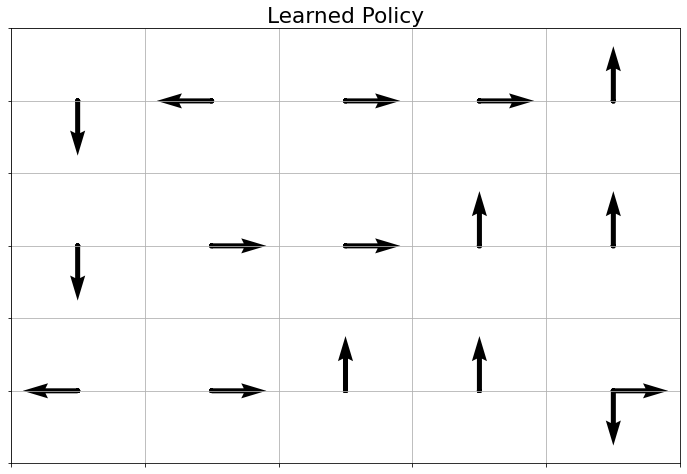

In [10]:
env.plot_policy(q_table)